0.97
Early stopping at epoch 228


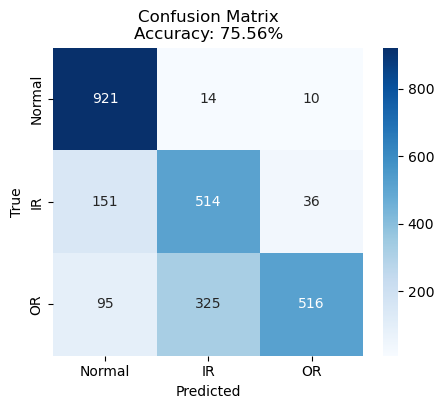

 - Model accuracy: 75.56%


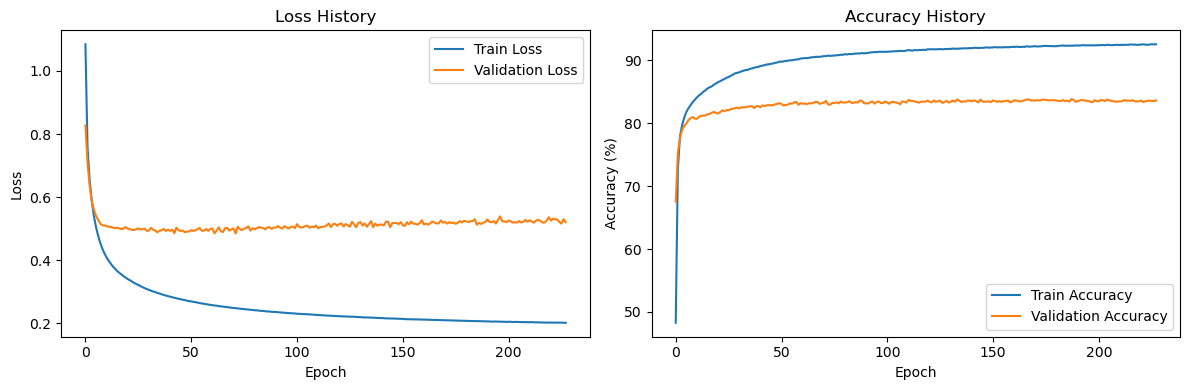

0.97
Early stopping at epoch 179


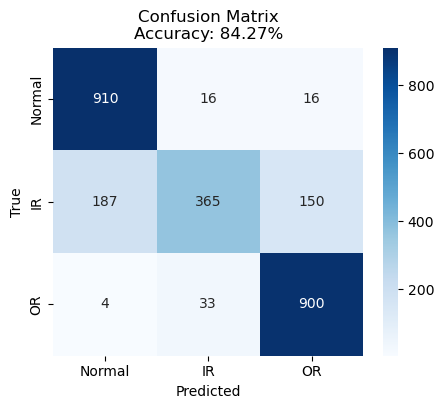

 - Model accuracy: 84.27%


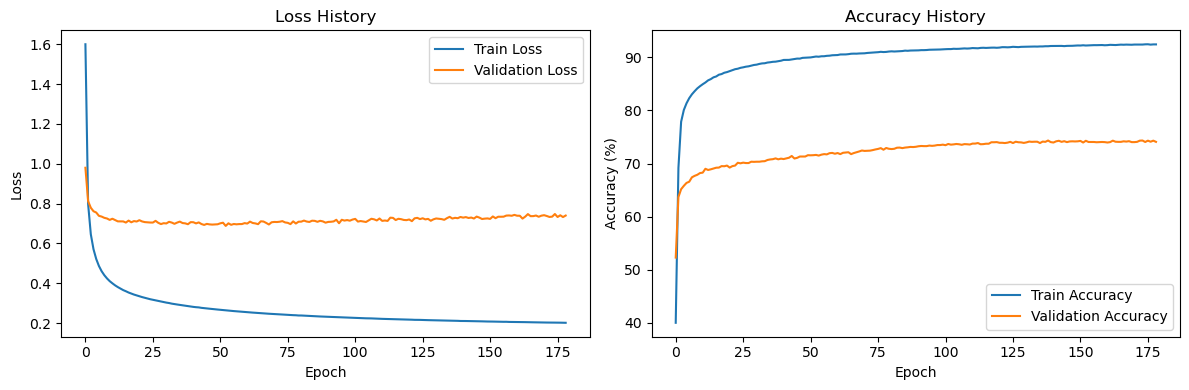

0.97
Early stopping at epoch 326


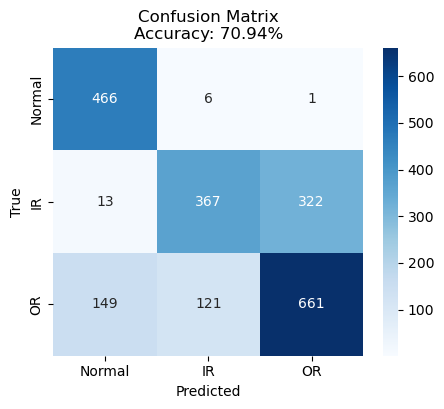

 - Model accuracy: 70.94%


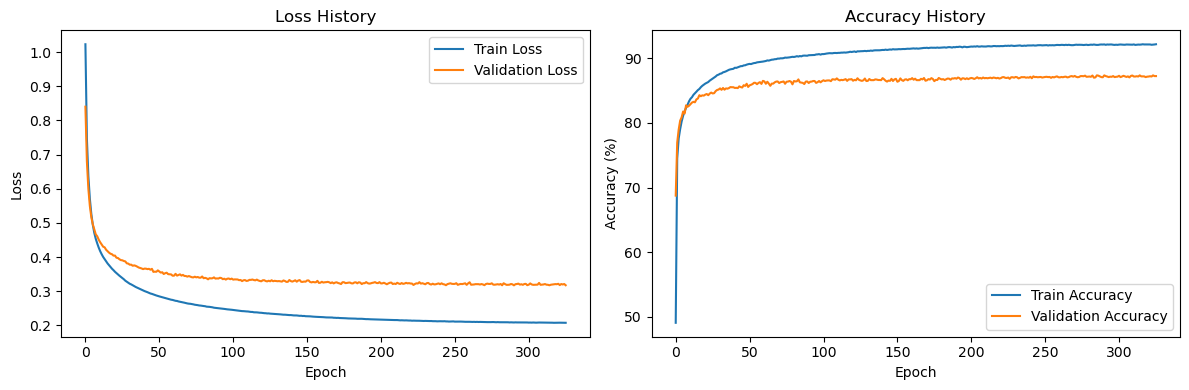

0.97
Early stopping at epoch 54


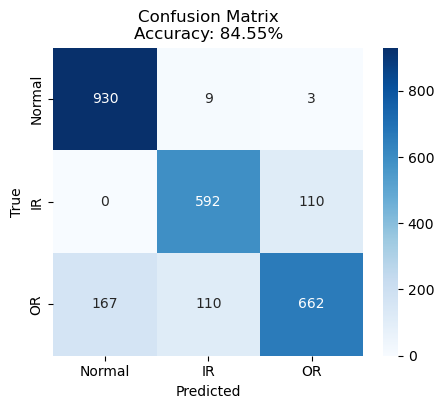

 - Model accuracy: 84.55%


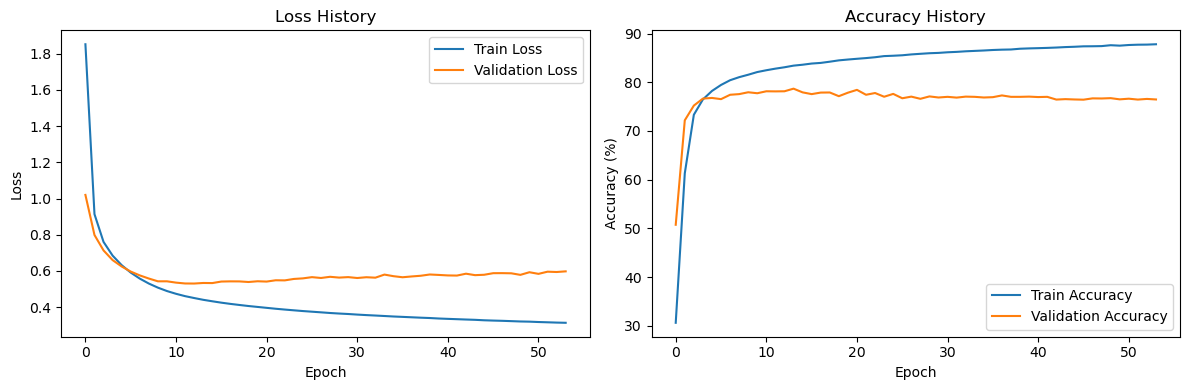

0.97
Early stopping at epoch 45


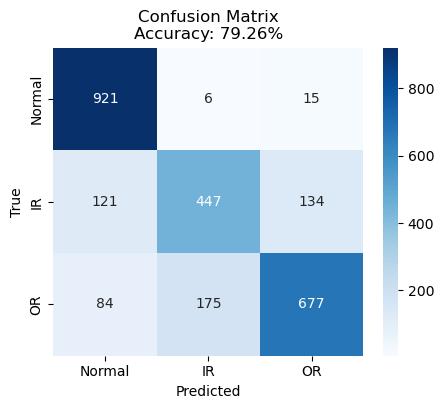

 - Model accuracy: 79.26%


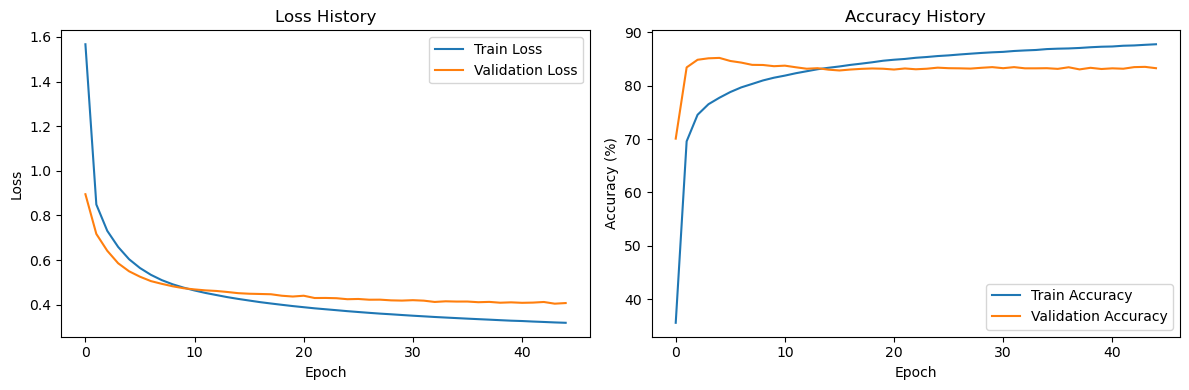

0.97
Early stopping at epoch 315


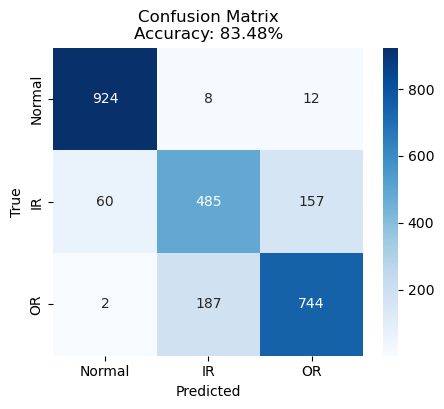

 - Model accuracy: 83.48%


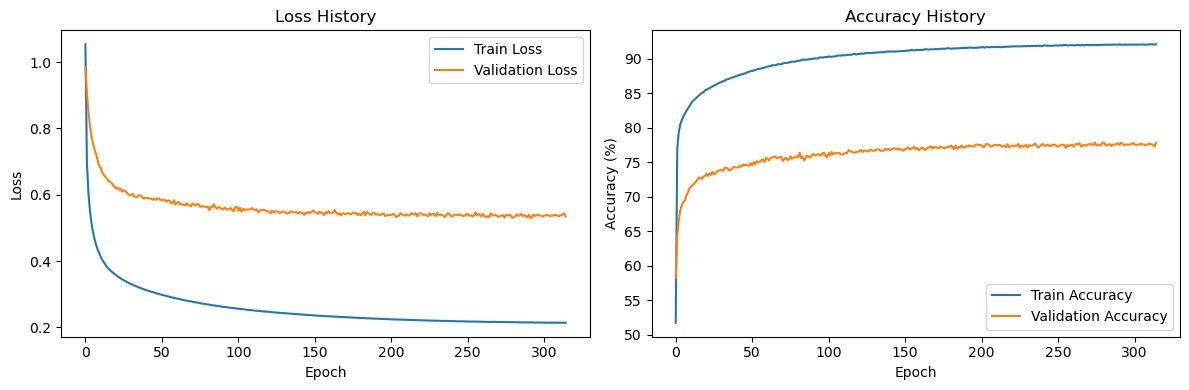

0.97
Early stopping at epoch 43


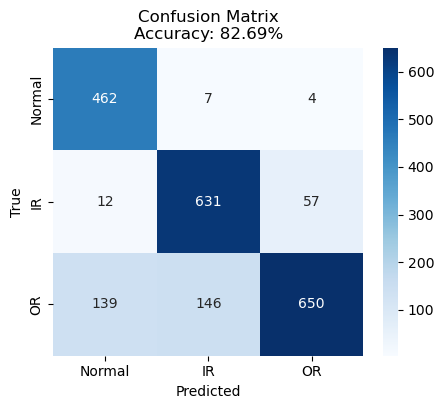

 - Model accuracy: 82.69%


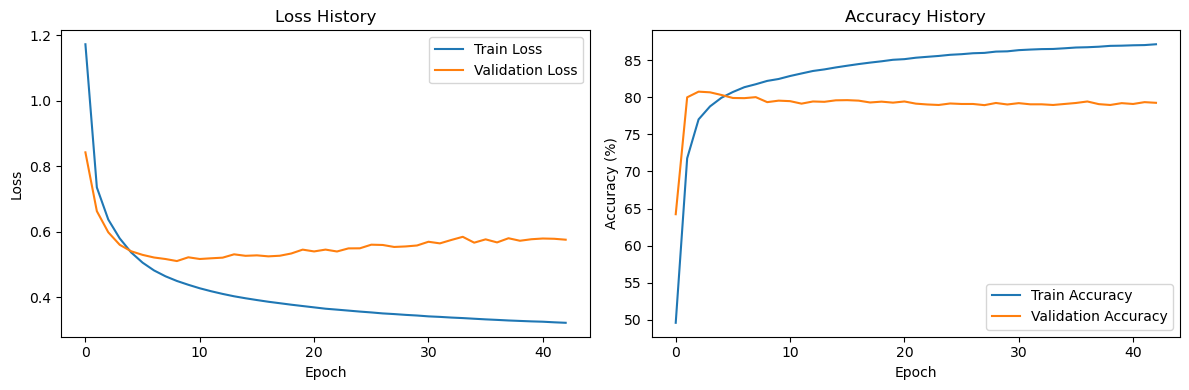

0.97
Early stopping at epoch 114


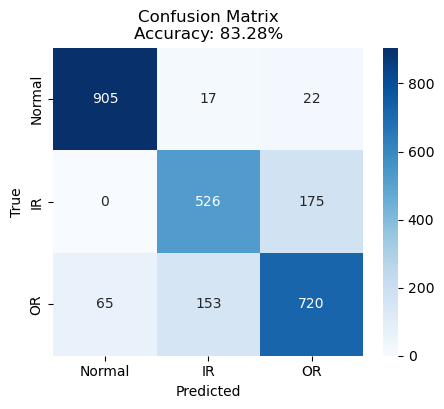

 - Model accuracy: 83.28%


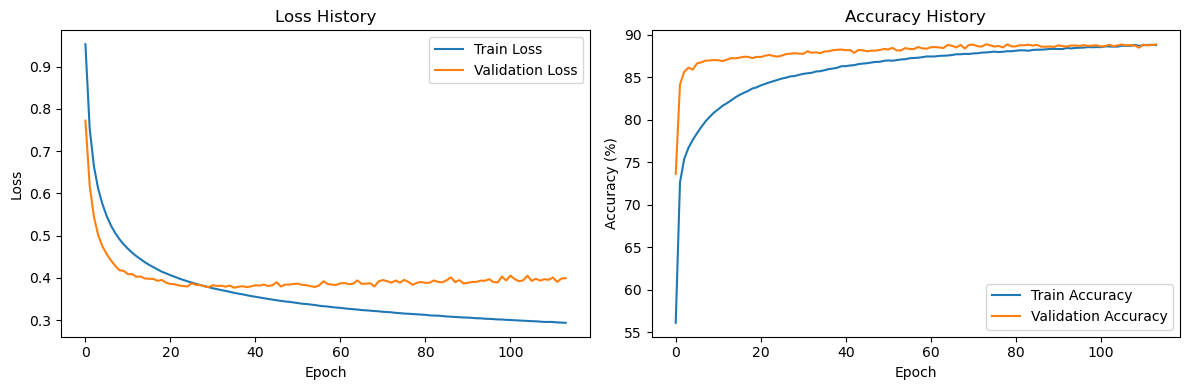

0.97
Early stopping at epoch 307


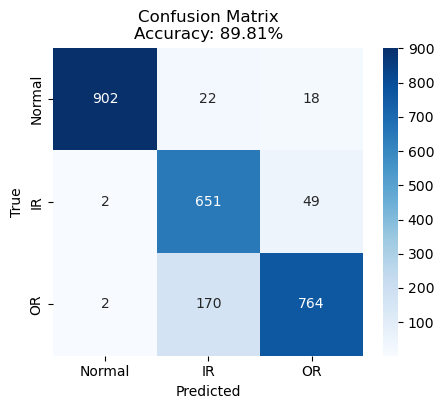

 - Model accuracy: 89.81%


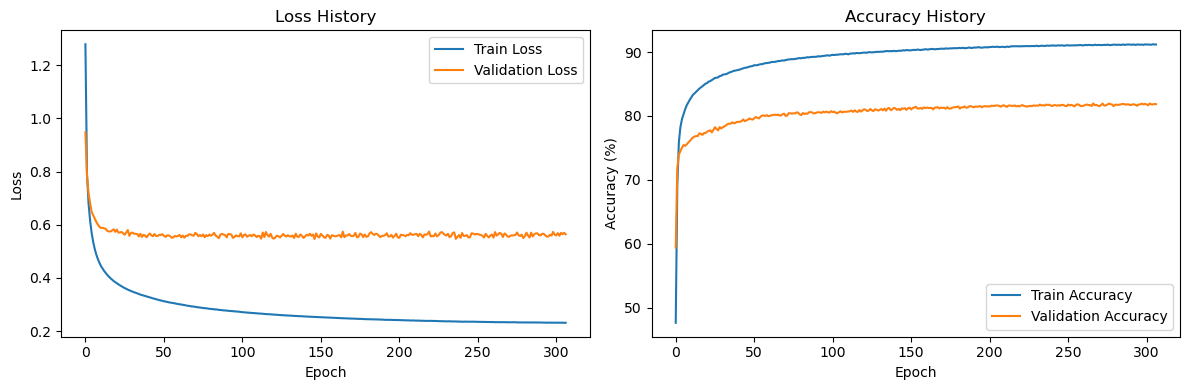

0.97
Early stopping at epoch 79


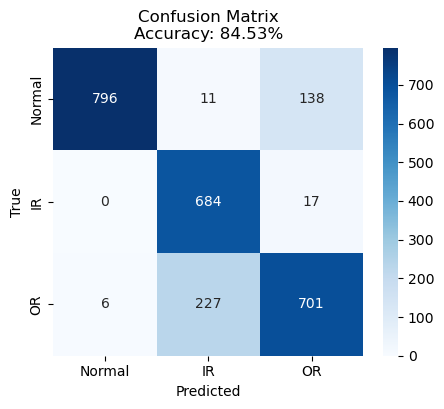

 - Model accuracy: 84.53%


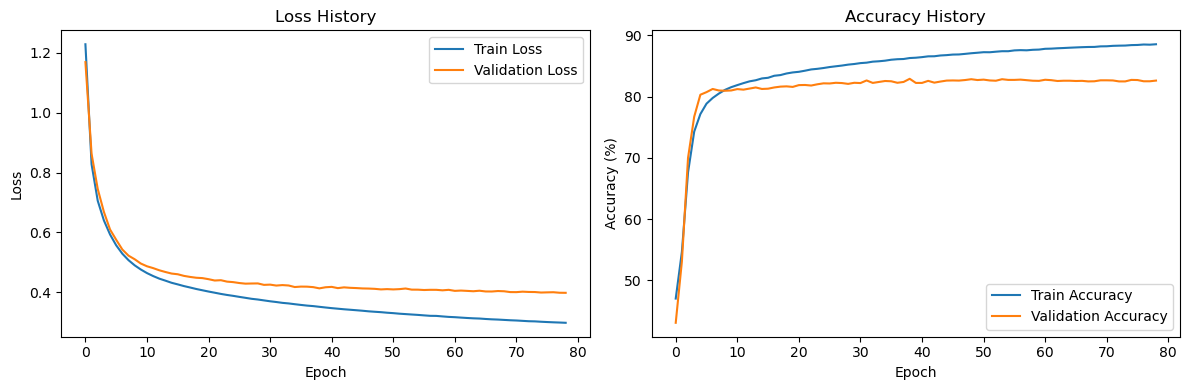

0.97
Early stopping at epoch 149


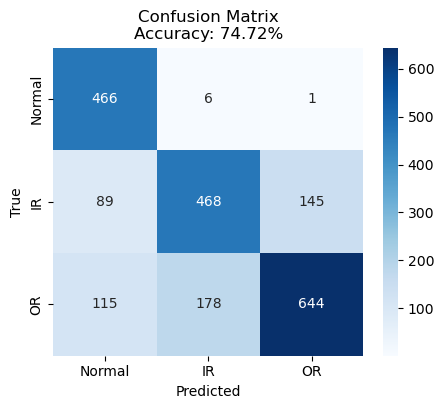

 - Model accuracy: 74.72%


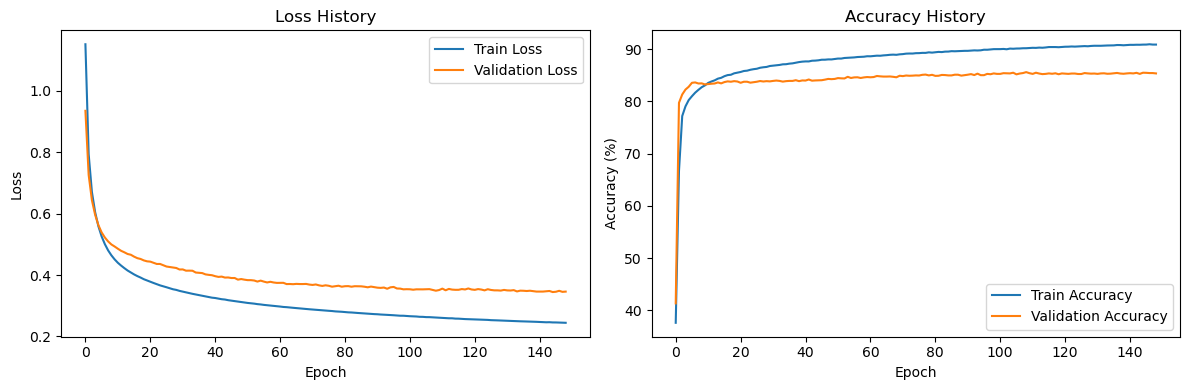

0.97
Early stopping at epoch 276


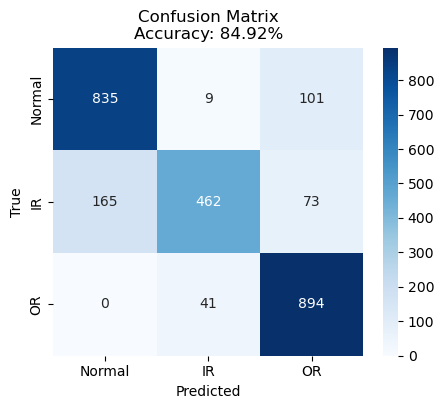

 - Model accuracy: 84.92%


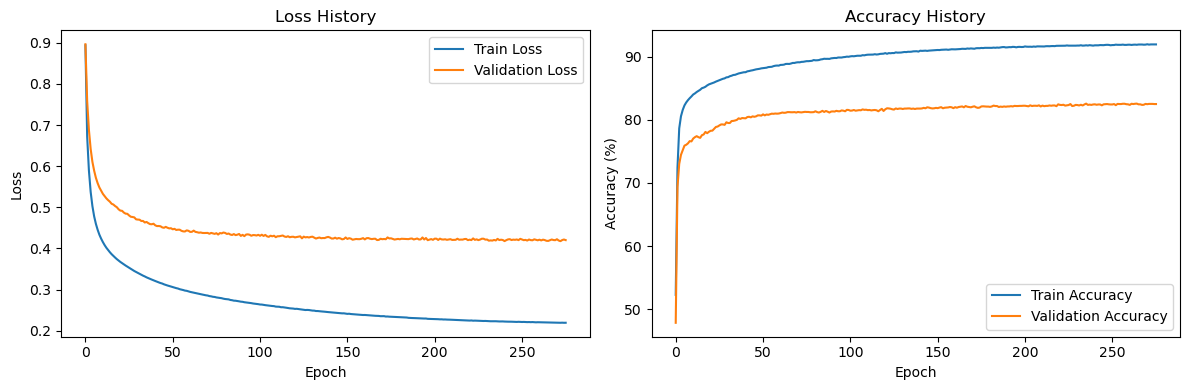

0.97
Early stopping at epoch 271


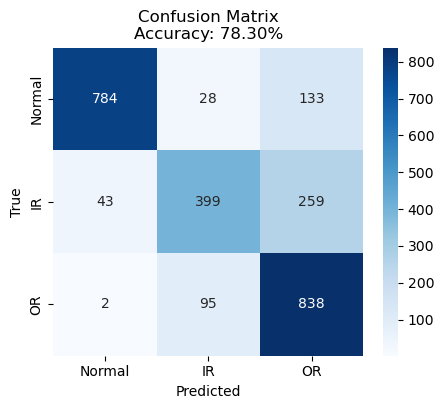

 - Model accuracy: 78.30%


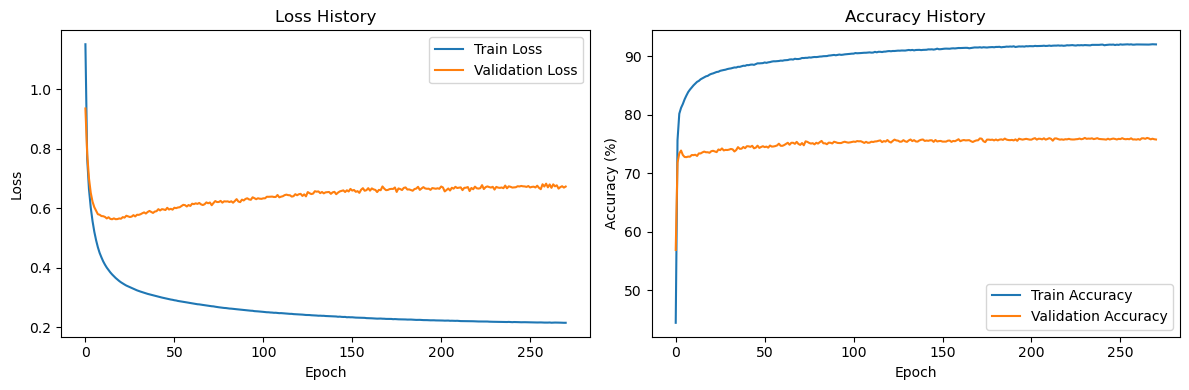

0.97
Early stopping at epoch 239


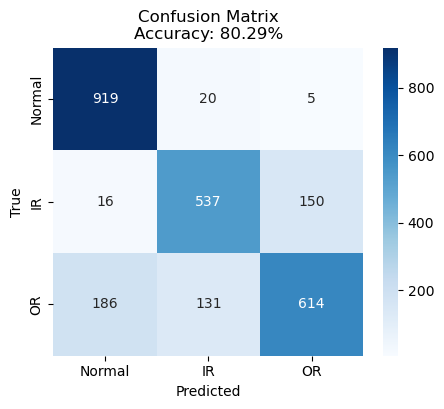

 - Model accuracy: 80.29%


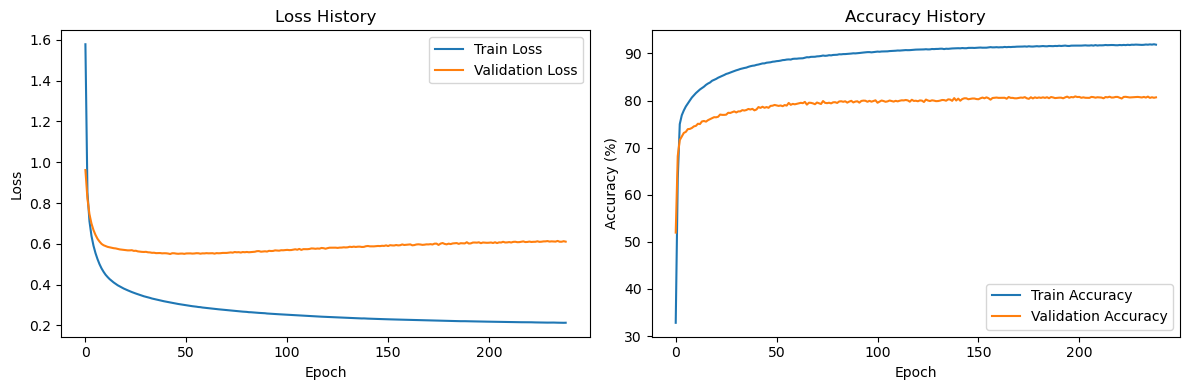

0.97
Early stopping at epoch 189


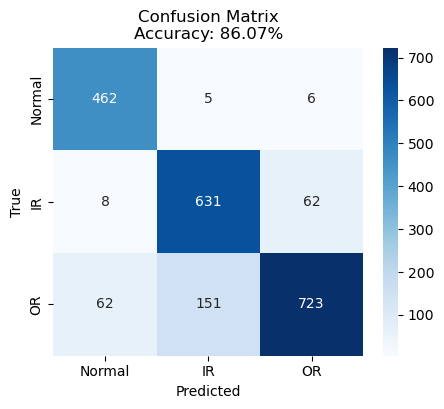

 - Model accuracy: 86.07%


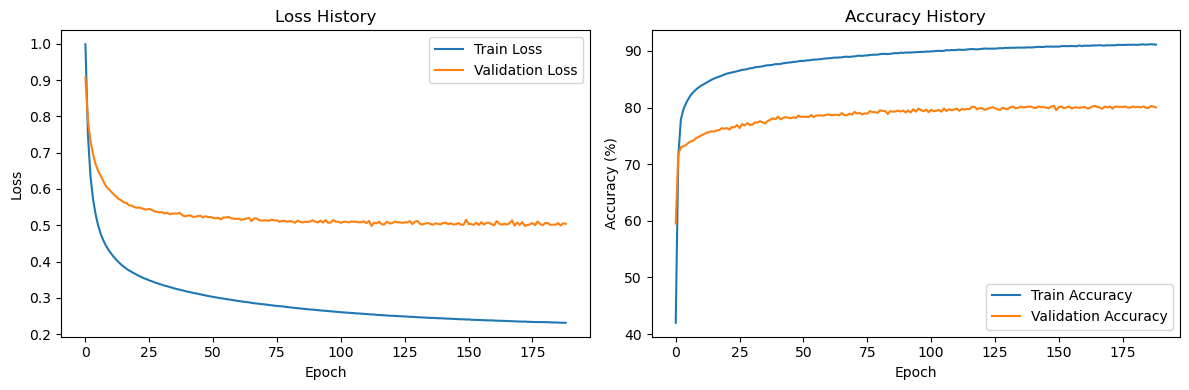

0.97
Early stopping at epoch 99


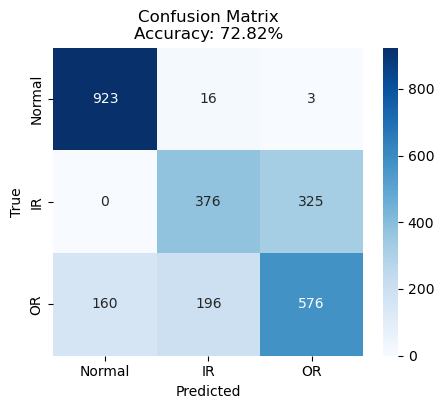

 - Model accuracy: 72.82%


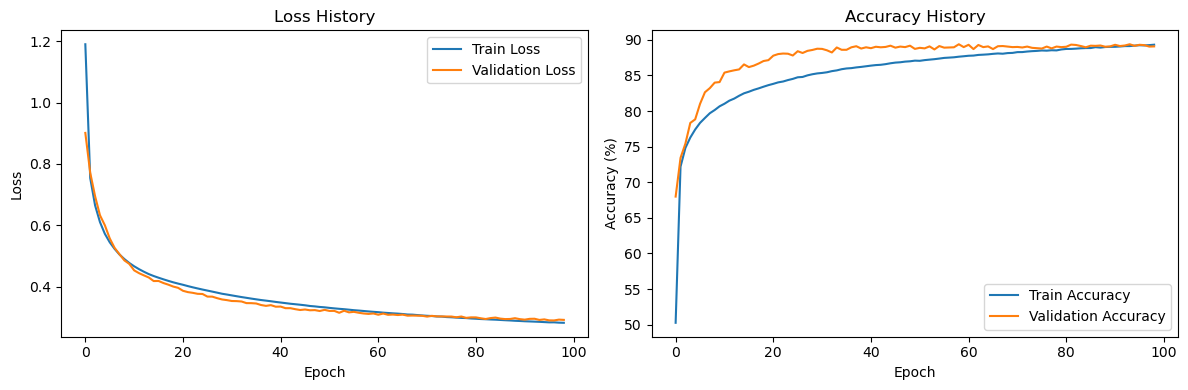

0.97
Early stopping at epoch 143


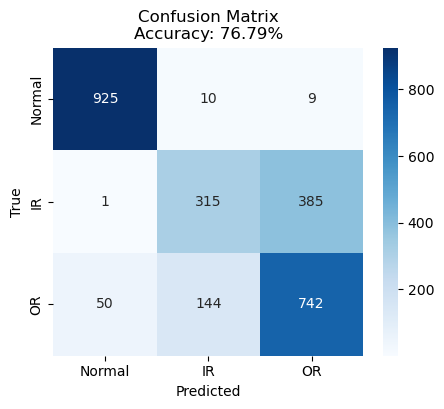

 - Model accuracy: 76.79%


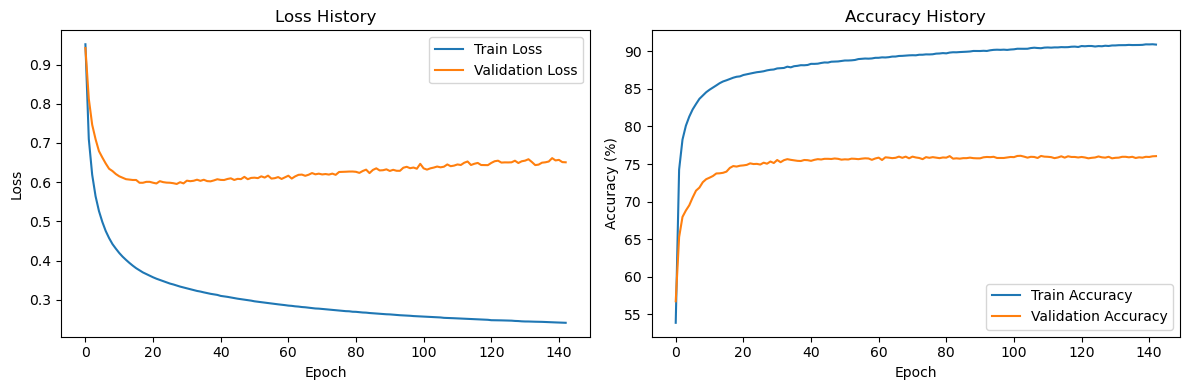

0.97
Early stopping at epoch 329


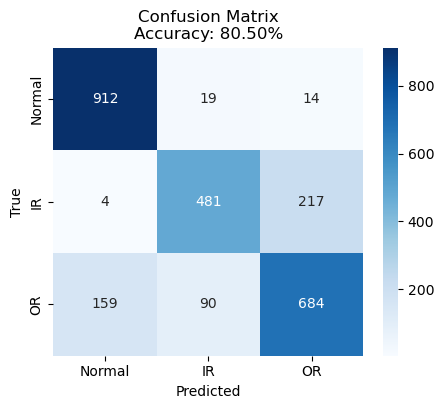

 - Model accuracy: 80.50%


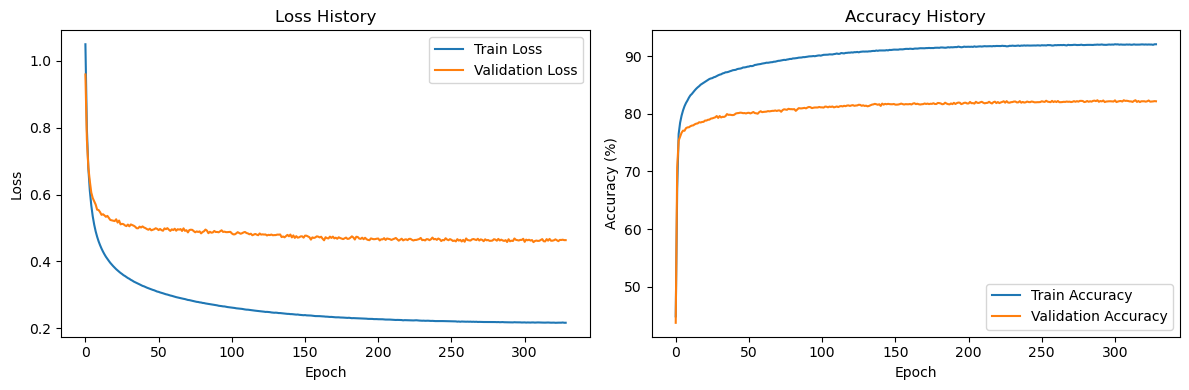

0.97
Early stopping at epoch 258


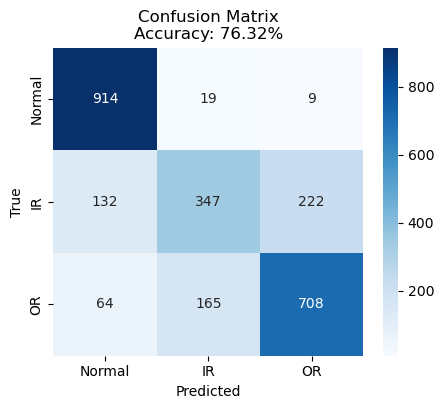

 - Model accuracy: 76.32%


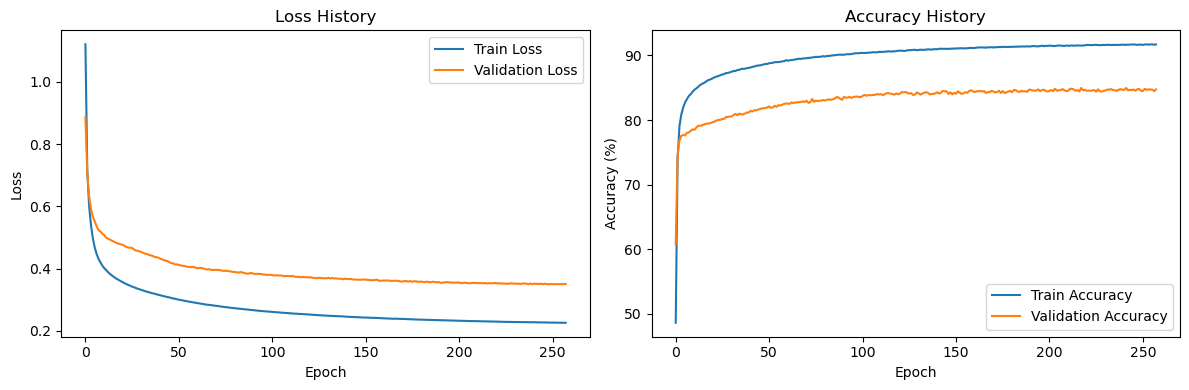

0.97
Early stopping at epoch 334


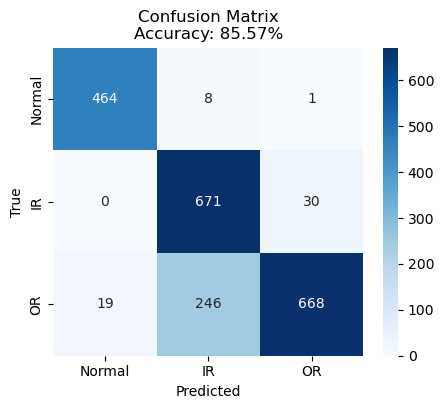

 - Model accuracy: 85.57%


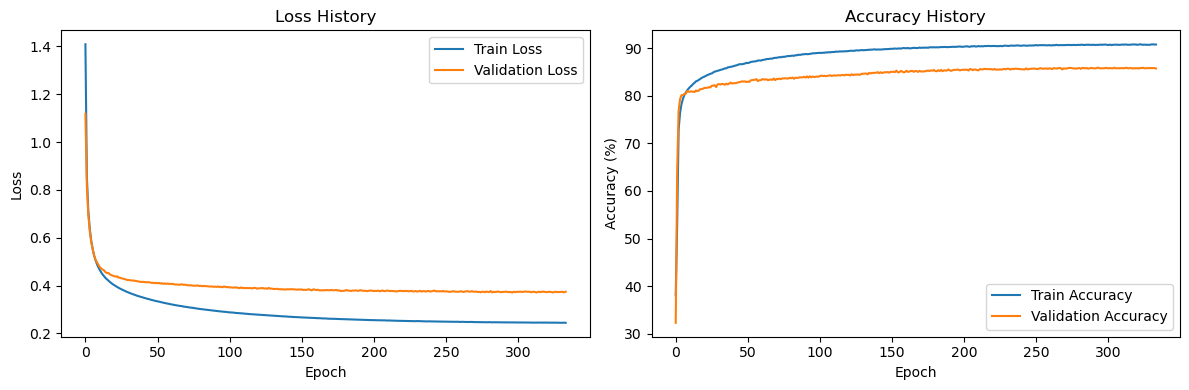

0.97
Early stopping at epoch 178


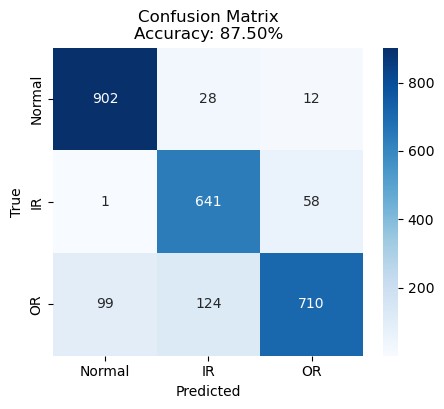

 - Model accuracy: 87.50%


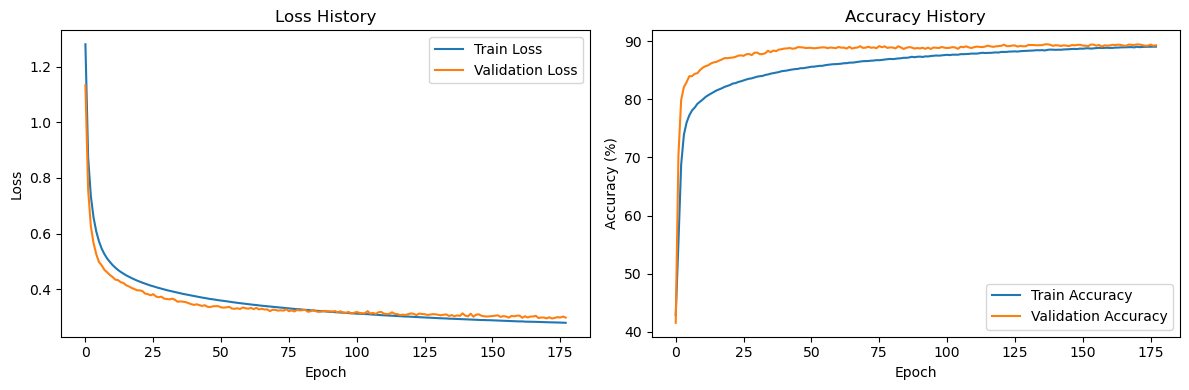

0.97
Early stopping at epoch 193


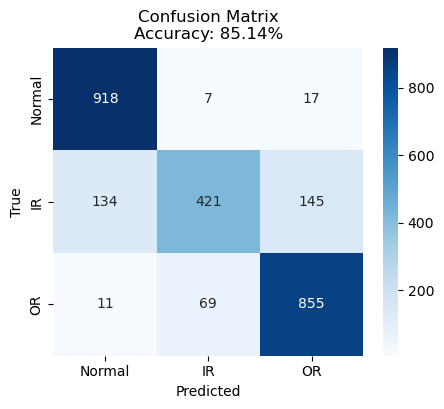

 - Model accuracy: 85.14%


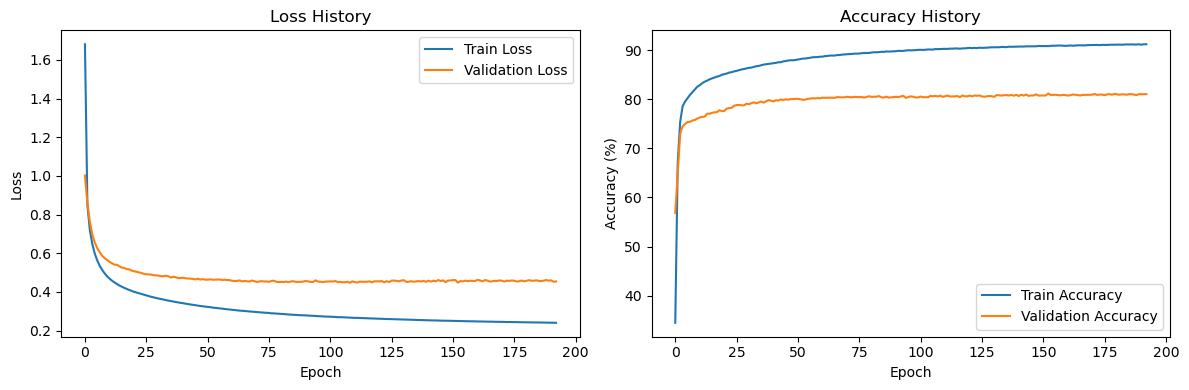

0.97
Early stopping at epoch 43


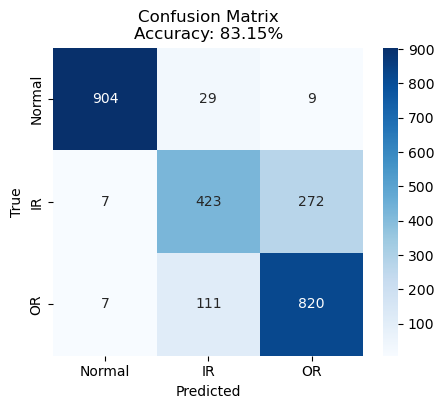

 - Model accuracy: 83.15%


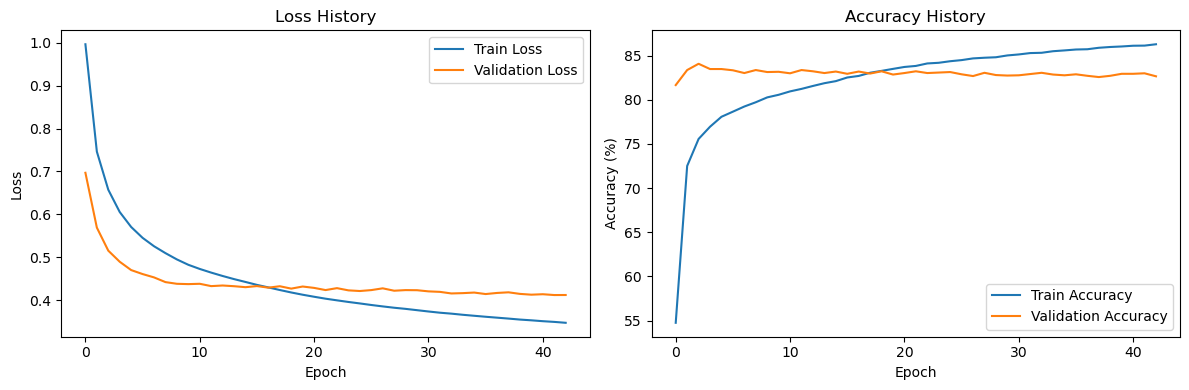

0.97
Early stopping at epoch 251


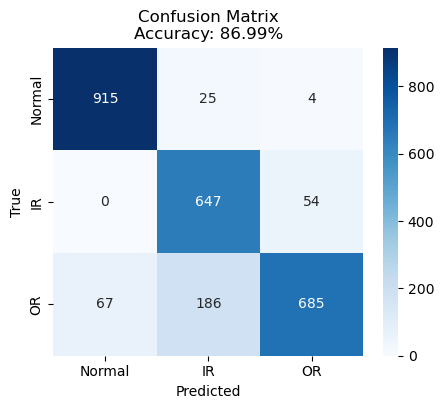

 - Model accuracy: 86.99%


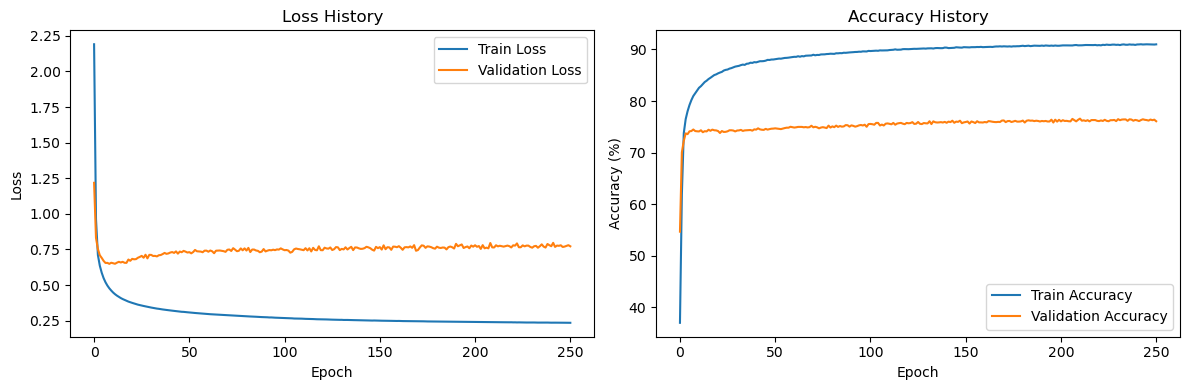

0.97
Early stopping at epoch 116


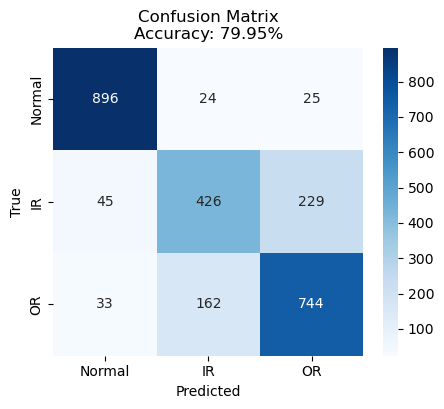

 - Model accuracy: 79.95%


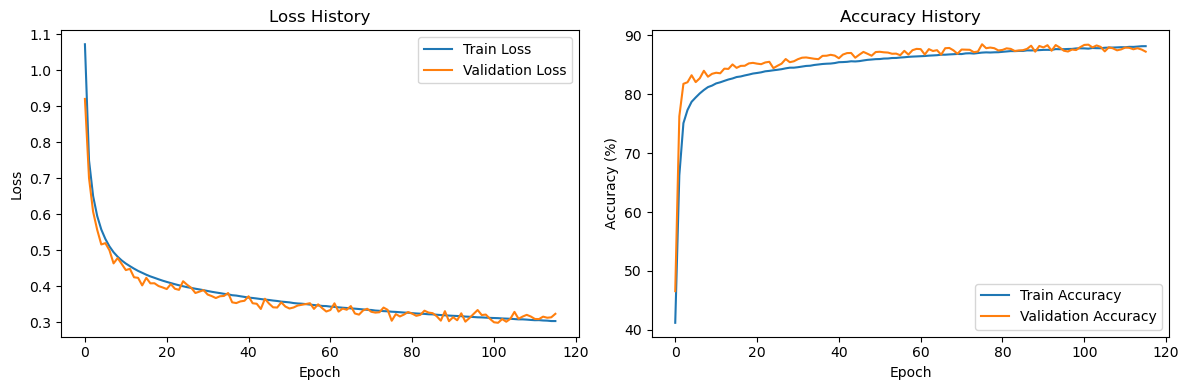

0.97
Early stopping at epoch 283


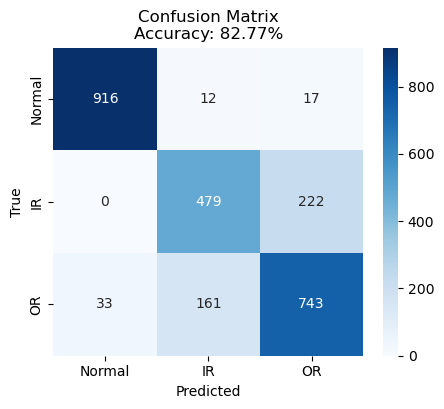

 - Model accuracy: 82.77%


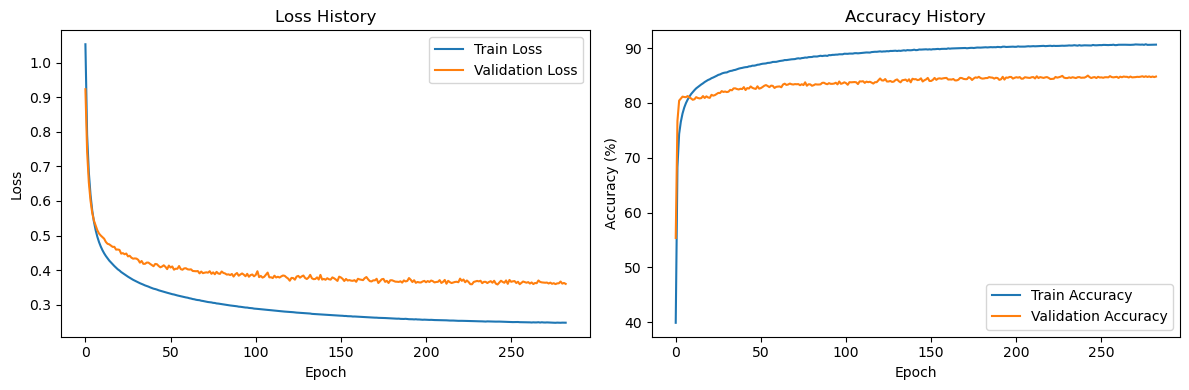

0.97
Early stopping at epoch 192


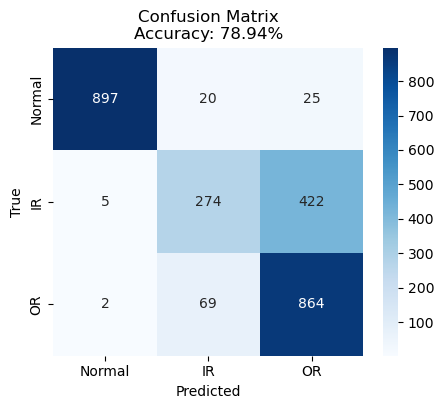

 - Model accuracy: 78.94%


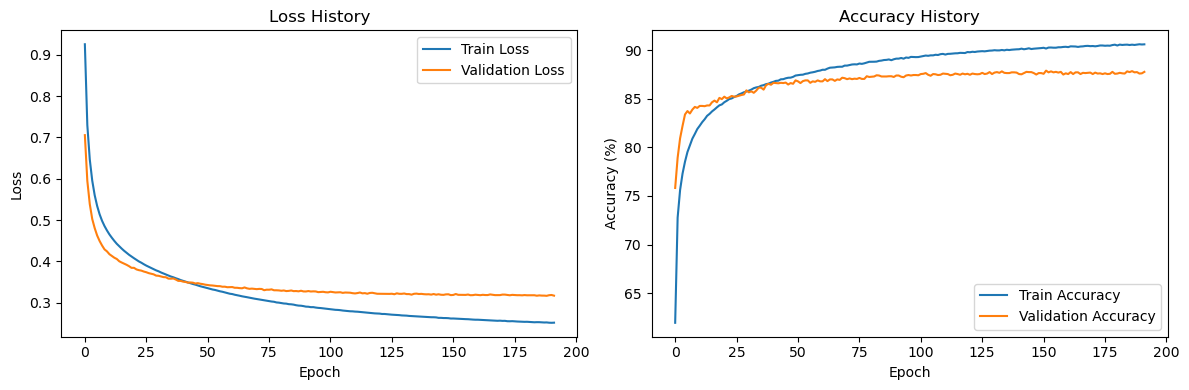

0.97
Early stopping at epoch 253


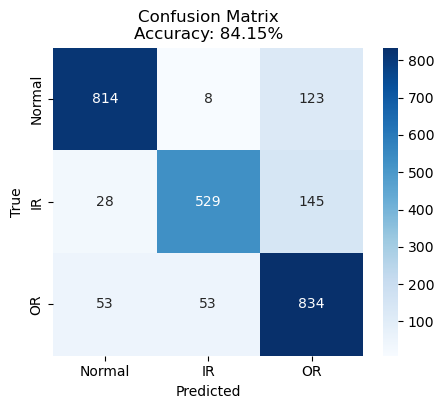

 - Model accuracy: 84.15%


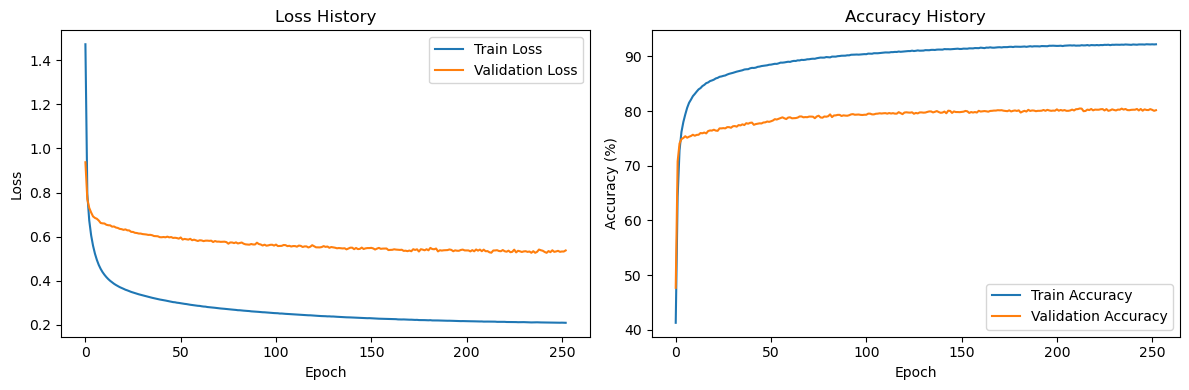

0.97
Early stopping at epoch 345


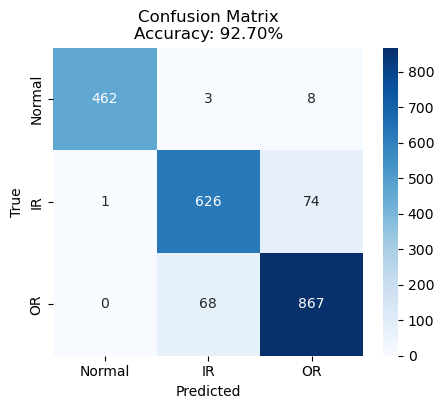

 - Model accuracy: 92.70%


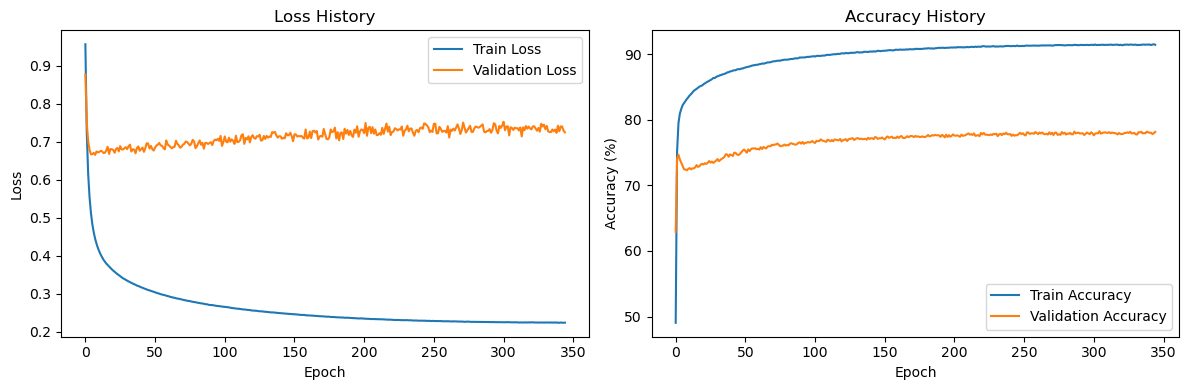

0.97
Early stopping at epoch 103


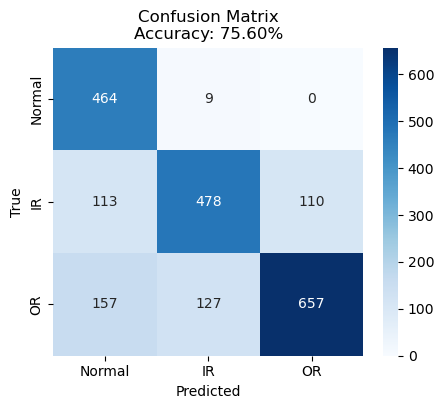

 - Model accuracy: 75.60%


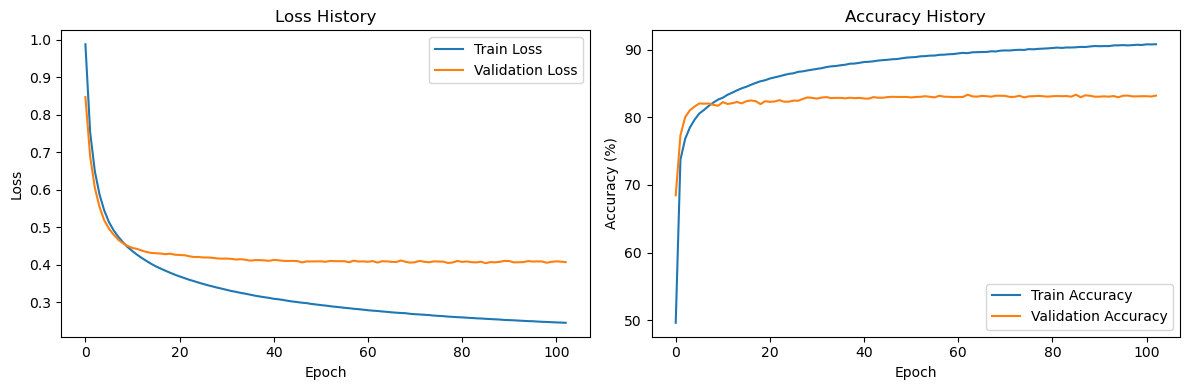

Mean accuracy: 0.8171890482801129
Std accuracy: 0.04987112009813333


In [1]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)
    X_train = X_train *1e2
    X_val = X_val *1e2
    X_test = X_test *1e2
    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Narrow_1DCNN(1,3)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))